# Bank Personal Loan

Nicolas Veas

## Introduction

Predicting if a customer will buy a personal loan or not has high importance to the bank, especially when it comes to marketing campaigns. If we know whether a customer will buy a loan or not, we can make better target marketing campaigns to increase success ratio.

In this project, I'll use classification model to predict customers' have higher probability of purchasing a loan.

The data used is from kaggle from the following link:

https://www.kaggle.com/datasets/mahnazarjmand/bank-personal-loan?resource=download

## Data

-  The data set consists of 14 features and 5000 observations from Taiwan.

## Objective

-  To predict whether a customer will buy a personal loan or not.

## Data Dictionary

-  ID: Customer ID
-  Age: Customer’s age in completed year
-  Experience: #years of professional experience
-  Income: Annual income of the customer (in thousand dollars)
-  ZIP Code: Home Address ZIP code.
-  Family: the Family size of the customer
-  CCAvg: Average spending on credit cards per month (in thousand dollars)
-  Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
-  Mortgage: Value of house mortgage if any. (in thousand dollars)
-  Personal Loan: Did this customer accept the personal loan offered in the last campaign?
-  Securities Account: Does the customer have securities account with the bank?
-  CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
-  Online: Do customers use internet banking facilities?
-  CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?


## Load Libraries


In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set_theme()
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

## Load the data


In [2]:
data = pd.read_csv("Bank_Personal_Loan.csv")
# create a duplicate
df = data.copy()

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Check if duplicates and removing if necesary


In [4]:
display(df[df.duplicated()].count())
df.drop_duplicates(inplace=True)

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## Check data info


In [5]:
display(df.info())
# data shape
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


None

(5000, 14)

### Comments:

    No null variables.
    5000 rows
    14 columns
    5 Numerical variables
    8 Categorical variables
    Personal_Loan is our dependent variable and it is categorical
    Age, Experience, income, CCAvg, Mortgage are numerical variables.
    Zipcode, Family, Education are categorical variables.
    Securities_Account, CD_Account, Online, CreditCard are categorical variables onehot encoded (yes/no converted to 1/0).

## Remove Not needed variables (ID)


In [6]:
if "ID" in df.columns:
    df.drop(["ID"], axis=1, inplace=True)

## Change Numerical Variables back into categorical variables


In [7]:
df["Education"].replace({1: "Undergrad", 2: "Graduate", 3: "Advanced/Professional"}, inplace=True)

## Multiplicate Income, CCAVG and Mortgage by 1000 to have values in dolars instead of thousand dolars


In [8]:
if "ZIP Code" in df.columns:
    df.Income = df.Income * 1000
    df.CCAvg = df.CCAvg * 1000
    df.Mortgage = df.Mortgage * 1000

## Lets convert categorical variables into category type and booleans into bool type


In [9]:
cats = ["ZIP Code", "Family", "Education"]
for cat in cats:
    if cat in df.columns:
        df[cat] = df[cat].astype("category")
bools = ["Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard"]
for bol in bools:
    if bol in df.columns:
        df[bol] = df[bol].astype("bool")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP Code            5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal Loan       5000 non-null   bool    
 9   Securities Account  5000 non-null   bool    
 10  CD Account          5000 non-null   bool    
 11  Online              5000 non-null   bool    
 12  CreditCard          5000 non-null   bool    
dtypes: bool(5), category(3), float64(1), int64(4)
memory usage: 259.5 KB


## Removing zipcode

we have 467 unique zip codes, we will remove this as it will generate a lot of noise


In [10]:
if "ZIP Code" in df.columns:
    print(df["ZIP Code"].unique())
    df.drop(["ZIP Code"], axis=1, inplace=True)

[91107, 90089, 94720, 94112, 91330, ..., 90068, 94970, 90813, 94404, 94598]
Length: 467
Categories (467, int64): [9307, 90005, 90007, 90009, ..., 96094, 96145, 96150, 96651]


In [11]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49000,4,1600.0,Undergrad,0,False,True,False,False,False
1,45,19,34000,3,1500.0,Undergrad,0,False,True,False,False,False
2,39,15,11000,1,1000.0,Undergrad,0,False,False,False,False,False
3,35,9,100000,1,2700.0,Graduate,0,False,False,False,False,False
4,35,8,45000,4,1000.0,Graduate,0,False,False,False,False,True


    * All datatypes and missing values where checked and corrected when necesary
    * Converted units of thousand dolars to dolars
    * New columns where added: county based on zipcode
    * Removed zipcode and ID.
    * New dataset is 5000 rows and 12 columns
    * 5 Numerical Variables
    * 8 Categorical variables


## Statistical summary of the dataset


In [12]:
# Numerical
df.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,45.338400,20.104600,73774.200000,1937.93800,56498.800000
std,11.463166,11.467954,46033.729321,1747.65898,101713.802102
min,23.000000,-3.000000,8000.000000,0.00000,0.000000
25%,35.000000,10.000000,39000.000000,700.00000,0.000000
50%,45.000000,20.000000,64000.000000,1500.00000,0.000000
75%,55.000000,30.000000,98000.000000,2500.00000,101000.000000
max,67.000000,43.000000,224000.000000,10000.00000,635000.000000


    Age between 23 and 67 years old
    Most customers doesnt have Mortage
    there are a min experience negative, probably was mistyped


In [13]:
# Categorical
df.describe(include=["object", "category", "bool"])

,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000,5000,5000,5000,5000,5000,5000
unique,4,3,2,2,2,2,2
top,1,Undergrad,False,False,False,True,False
freq,1472,2096,4520,4478,4698,2984,3530


    Most customers are single
    Over 2000 customers are Undergaduated
    Only 480 customers of 5000 had Personal Loan (around 10%)
    Most cutomers have online usage
    4478 customers doesn't have Securities account, ~10% have it
    4478 customers doesn't have CD account, ~10% have it
    3530 customers doesn't have Credit Card, ~30% have it
    Most of the customers are from Los Angeles County, around 21%


## Check our Target Variable


Personal Loan
False    0.904
True     0.096
Name: proportion, dtype: float64

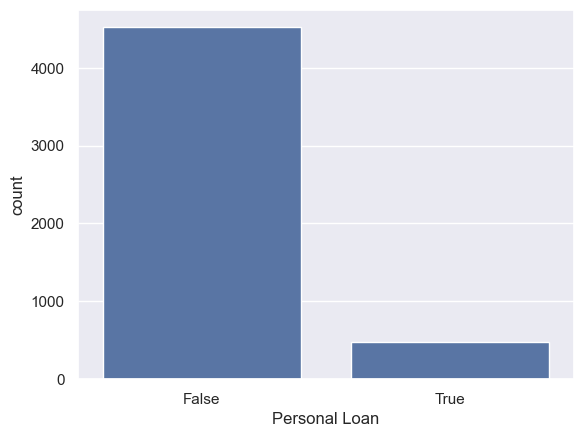

In [14]:
sns.countplot(x="Personal Loan", data=df)
df["Personal Loan"].value_counts(normalize=True)

## Check Correlation


<Axes: >

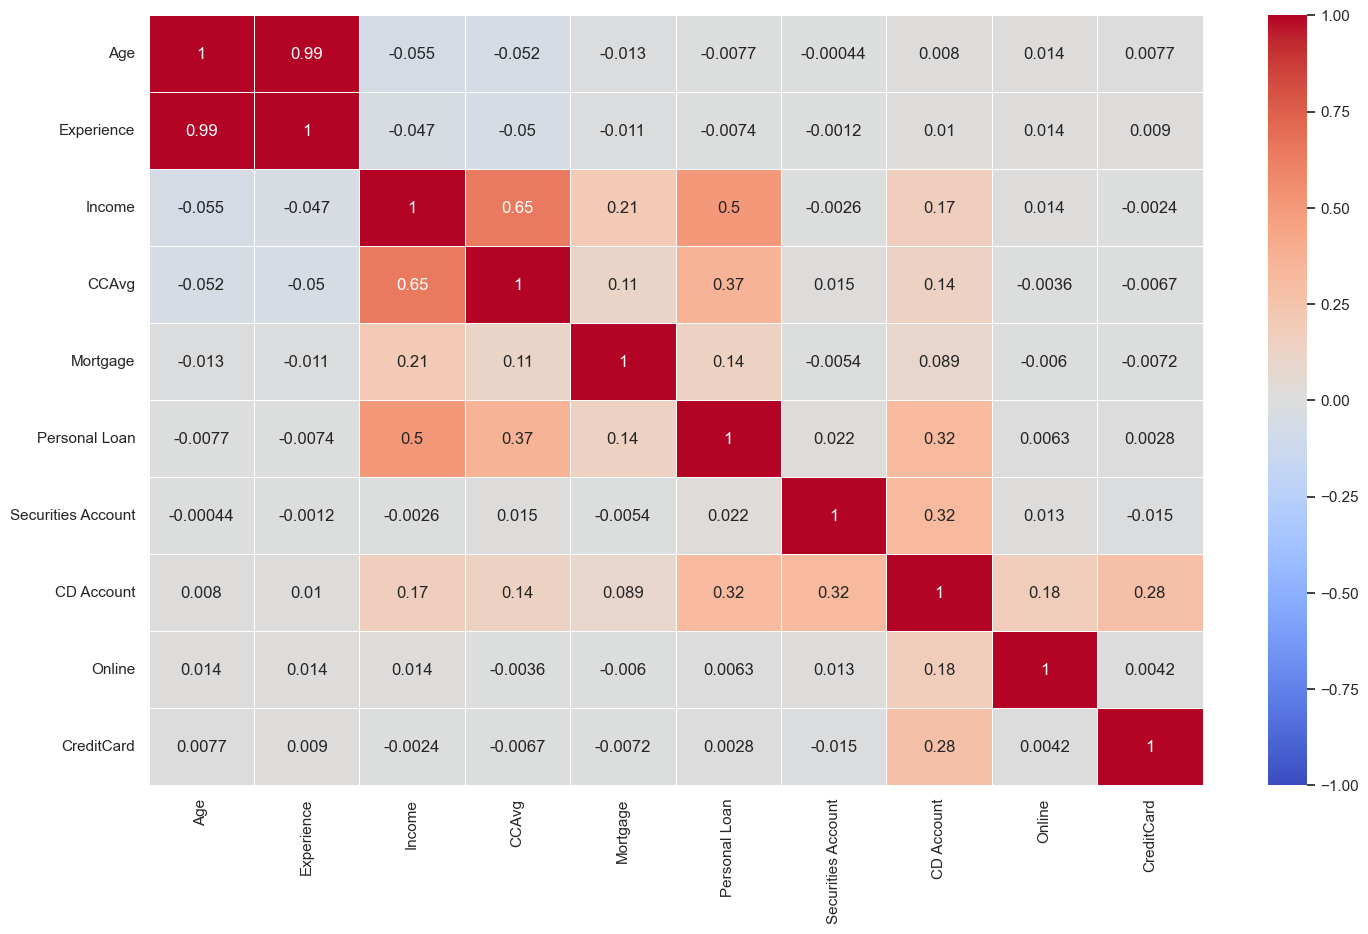

In [15]:
plt.figure(figsize=(17, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=0.5, cmap="coolwarm", vmin=-1, vmax=1)

    Age and experience are high correlated (.99), as we can expect.
    CCAvg and income are also correlated (.65)


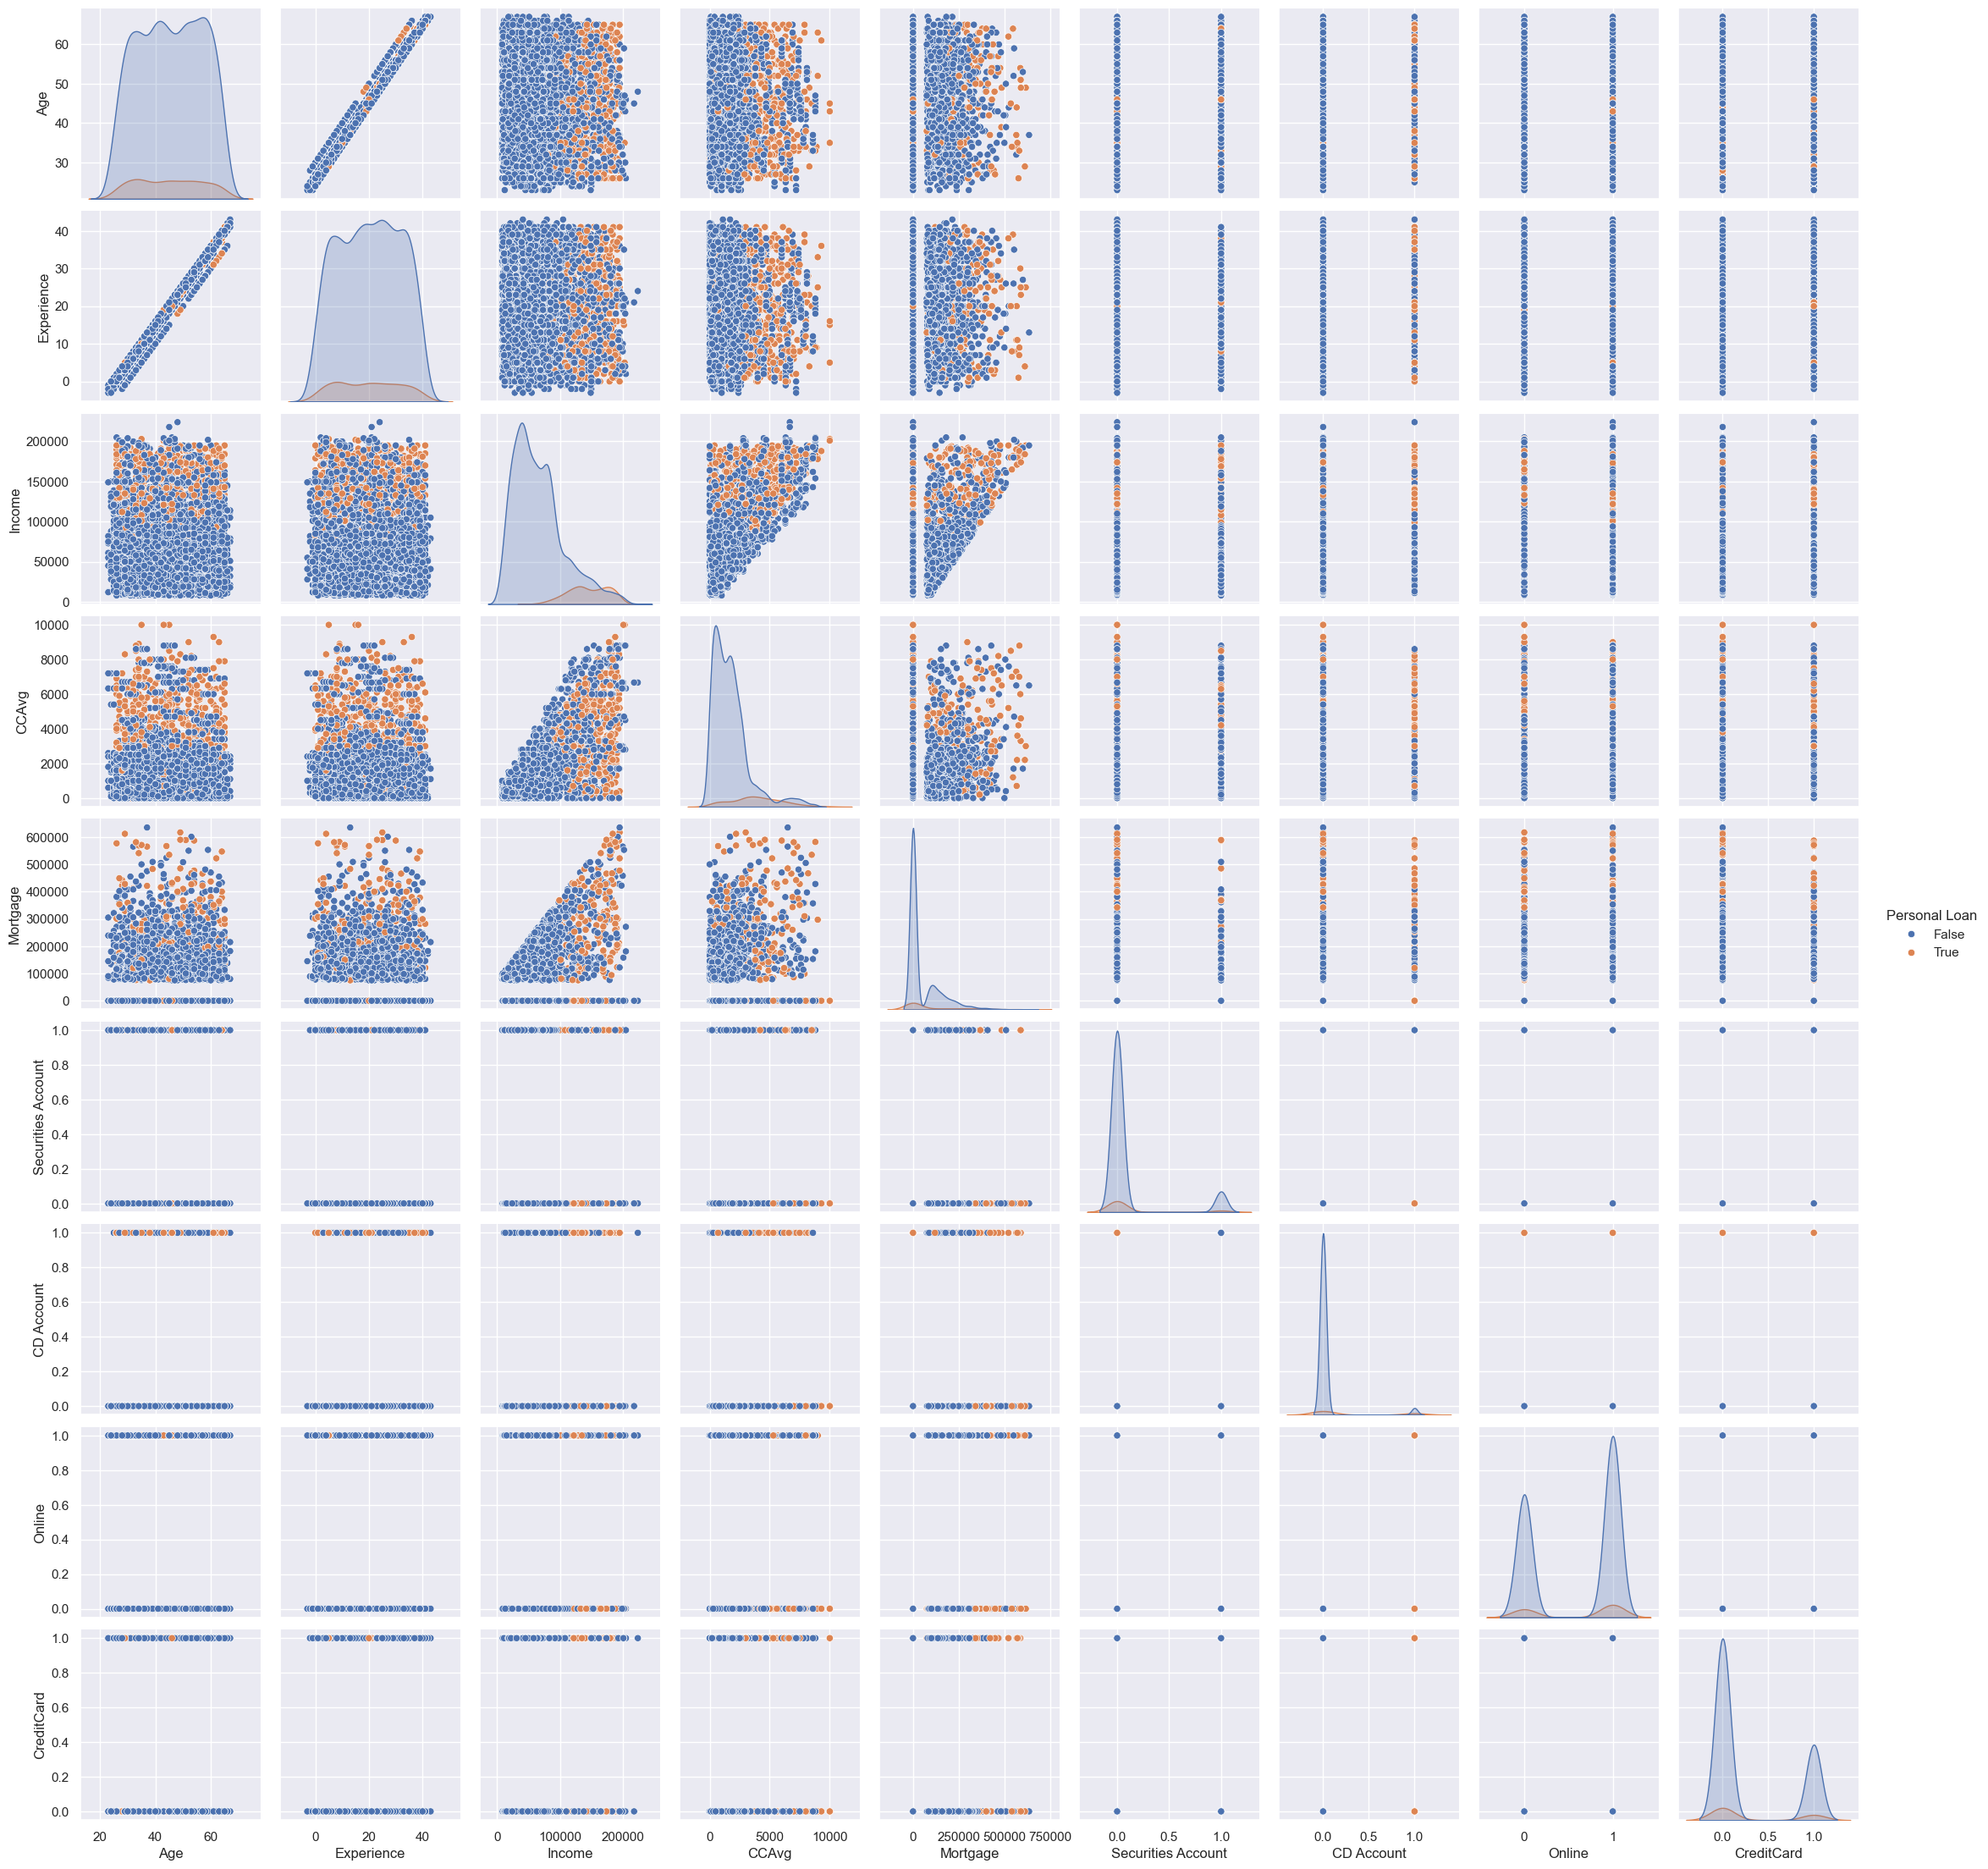

In [16]:
sns.pairplot(df, hue="Personal Loan", diag_kind="kde")

-  Age and Experience are highly correlated with linear relationship


In [17]:
def stacked_plot(x):
    tab1 = pd.crosstab(x, df["Personal Loan"], margins=True)
    display(tab1)
    display("-" * 120)
    tab = pd.crosstab(x, df["Personal Loan"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal Loan,False,True,All
Family,,,
1,1365,107,1472
2,1190,106,1296
3,877,133,1010
4,1088,134,1222
All,4520,480,5000


'------------------------------------------------------------------------------------------------------------------------'

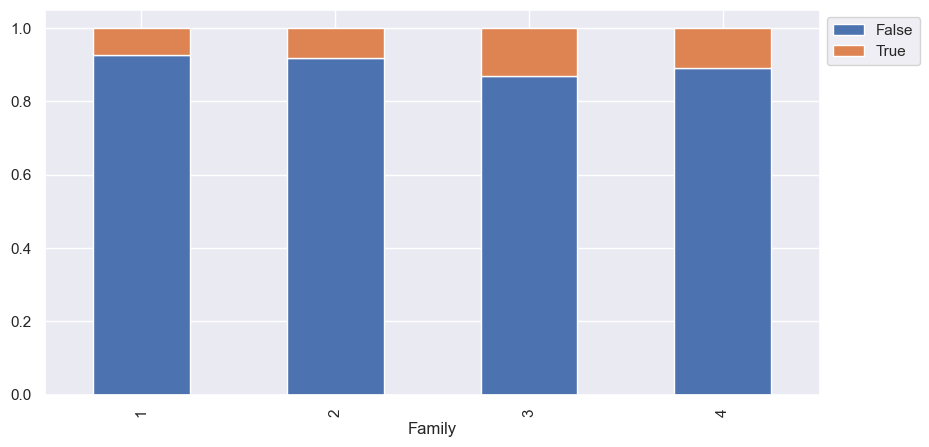

In [18]:
stacked_plot(df.Family)

    Personal_loans were given more to families of 3 and 4 children.


Personal Loan,False,True,All
Education,,,
Advanced/Professional,1296,205,1501
Graduate,1221,182,1403
Undergrad,2003,93,2096
All,4520,480,5000


'------------------------------------------------------------------------------------------------------------------------'

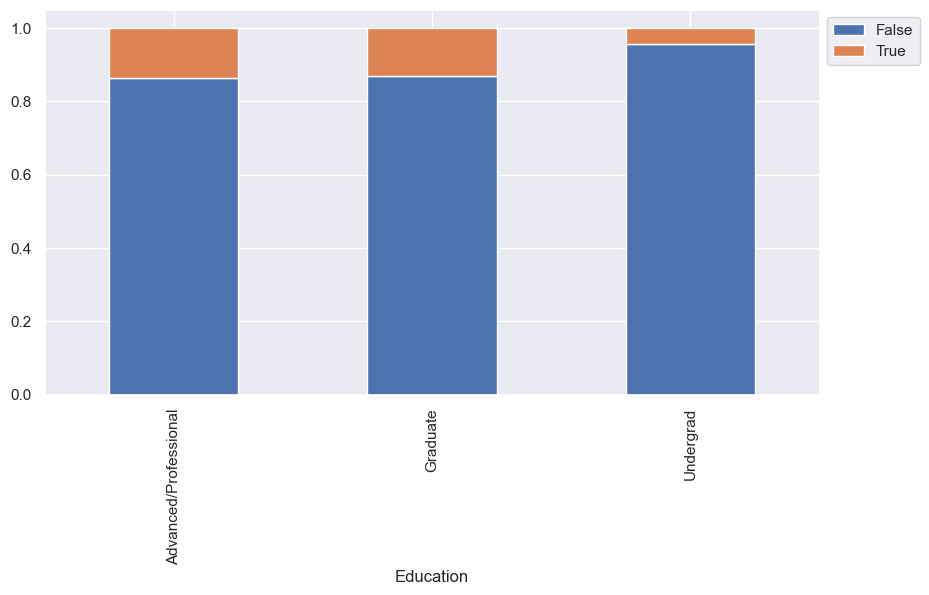

In [19]:
stacked_plot(df.Education)

    Personal_loans were given more to customer graduated and andvanced/professional


Personal Loan,False,True,All
CD Account,,,
False,4358,340,4698
True,162,140,302
All,4520,480,5000


'------------------------------------------------------------------------------------------------------------------------'

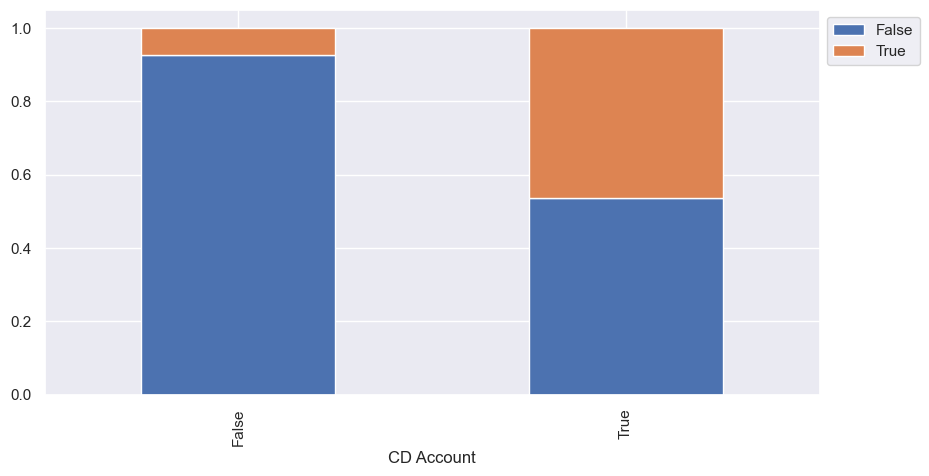

In [20]:
stacked_plot(df["CD Account"])

    around 45% of the people with CD_Account got Personal Loan


## Data Preparation


In [50]:
# Getting Dummies for the categorical variables.

dummy_data = pd.get_dummies(df, drop_first=True, dtype=np.uint8)
dummy_data["Mortgage"] = np.log(dummy_data["Mortgage"] + 1)
display(dummy_data.head())
dummy_data.info()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_Graduate,Education_Undergrad
0,25,1,49000,1600.0,0.0,False,True,False,False,False,0,0,1,0,1
1,45,19,34000,1500.0,0.0,False,True,False,False,False,0,1,0,0,1
2,39,15,11000,1000.0,0.0,False,False,False,False,False,0,0,0,0,1
3,35,9,100000,2700.0,0.0,False,False,False,False,False,0,0,0,1,0
4,35,8,45000,1000.0,0.0,False,False,False,False,True,0,0,1,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   Experience           5000 non-null   int64  
 2   Income               5000 non-null   int64  
 3   CCAvg                5000 non-null   float64
 4   Mortgage             5000 non-null   float64
 5   Personal Loan        5000 non-null   bool   
 6   Securities Account   5000 non-null   bool   
 7   CD Account           5000 non-null   bool   
 8   Online               5000 non-null   bool   
 9   CreditCard           5000 non-null   bool   
 10  Family_2             5000 non-null   uint8  
 11  Family_3             5000 non-null   uint8  
 12  Family_4             5000 non-null   uint8  
 13  Education_Graduate   5000 non-null   uint8  
 14  Education_Undergrad  5000 non-null   uint8  
dtypes: bool(5), float64(2), int64(3), uint

### Split the data into features(X) and target variable(Y)

Our target variable is "DEFAULT"


In [51]:
## Defining X and Y variables
X = dummy_data.drop("Personal Loan", axis=1)  # Features
Y = dummy_data["Personal Loan"].astype(np.uint8)  # TARGET VARIABLE
X["Securities Account"] = X["Securities Account"].astype("uint8")
X["CD Account"] = X["CD Account"].astype("uint8")
X.Online = X.Online.astype("uint8")
X.CreditCard = X.CreditCard.astype("uint8")

### Splitting data into train and test

Split our data into train(70%) and test(30%)


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
# check percentage of default
print("Default Train", y_train.value_counts(normalize=True))
print("Default Test", y_test.value_counts(normalize=True))

Default Train Personal Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Default Test Personal Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building


In [60]:
from sklearn.metrics import ConfusionMatrixDisplay, recall_score
from sklearn.model_selection import cross_val_score, cross_validate


def print_stats(model, X_train, X_test, y_train, y_test):
    # train = cross_validate(model, X_train, y_train, scoring="recall", cv=3, n_jobs=-1)
    # test = cross_validate(model, X_test, y_test, scoring="recall", cv=3, n_jobs=-1)
    print("Recall train:", recall_score(y_train, model.predict(X_train)))
    print("Recall test:", recall_score(y_test, model.predict(X_test)))

    # print("CV recall train:", train["test_score"].mean())
    # print("CV recall test:", test["test_score"].mean())
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

### Logistic Regression Model


Recall train: 0.2930513595166163
Recall test: 0.24161073825503357


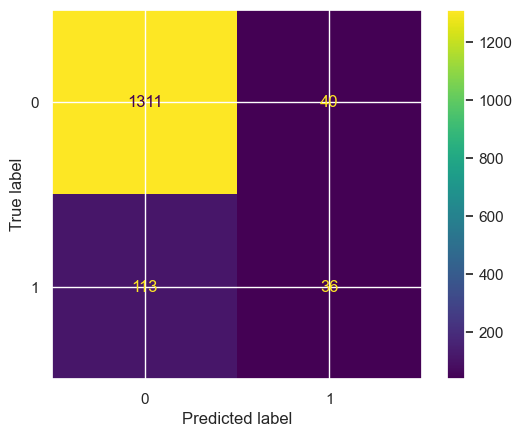

In [61]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(solver="liblinear")
logReg.fit(X_train, y_train)
print_stats(logReg, X_train, X_test, y_train, y_test)

    Model doesn't perform well


Check ROC CURVE


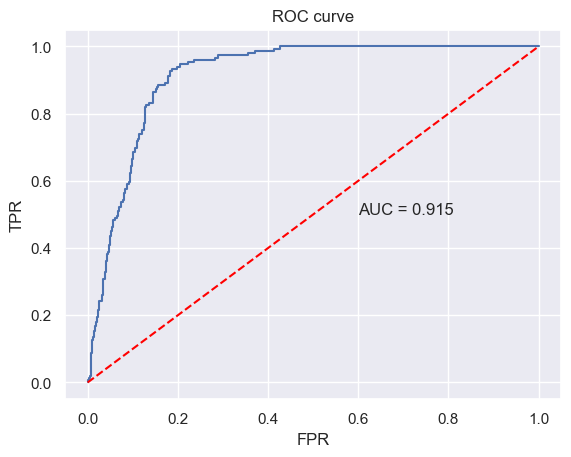

optimal threshold: 0.0809773407265394


In [62]:
from sklearn.metrics import roc_auc_score, roc_curve


ypp = logReg.predict_proba(X_test)
y_pred = ypp[:, 1]
fpr, tpr, th = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.text(0.6, 0.5, "AUC = %0.3f" % auc_score)
plt.show()
fpr, tpr, thresholds = roc_curve(y_test, logReg.predict_proba(X_test)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("optimal threshold:", optimal_threshold)

### Using the optimal threshold


In [63]:
y_pred_tr = (logReg.predict_proba(X_train)[:, 1] > optimal_threshold).astype(int)
y_pred_ts = (logReg.predict_proba(X_test)[:, 1] > optimal_threshold).astype(int)
logReg_op_test_score = recall_score(y_test, y_pred_ts)
print("Recall on training set : ", recall_score(y_train, y_pred_tr))
print("Recall on test set : ", logReg_op_test_score)

Recall on training set :  0.9395770392749244
Recall on test set :  0.9261744966442953


### Decision Tree Model


Recall train: 1.0
Recall test: 0.8859060402684564


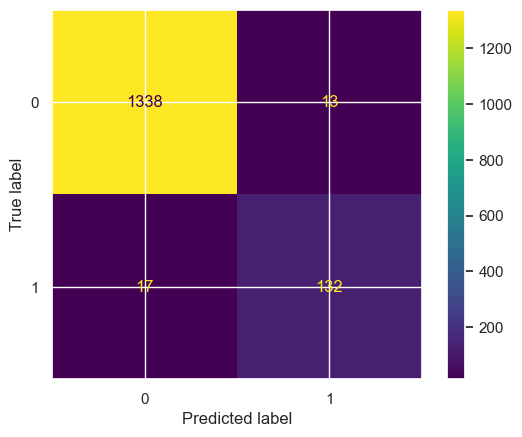

In [64]:
from sklearn.tree import DecisionTreeClassifier


desTree = DecisionTreeClassifier(random_state=1)
desTree.fit(X_train, y_train)
print_stats(desTree, X_train, X_test, y_train, y_test)

    Decision Tree performs better
    Model is overfitting

Find better hyperparameters using grid search CV


In [65]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

params = {
    "criterion": ["entropy", "gini"],
    "max_depth": range(5, 35, 3),
    "min_samples_leaf": range(0, 10),
    "min_samples_split": range(2, 7),
    "ccp_alpha": np.linspace(0.001, 0.01, 10),
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
grid_cv = GridSearchCV(desTree, params, scoring=scorer, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print("Best parameters are {} with CV recall score={}:".format(grid_cv.best_params_, grid_cv.best_score_))

Best parameters are {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 2} with CV recall score=0.9245427245427246:


Recall train: 0.9154078549848943
Recall test: 0.8187919463087249


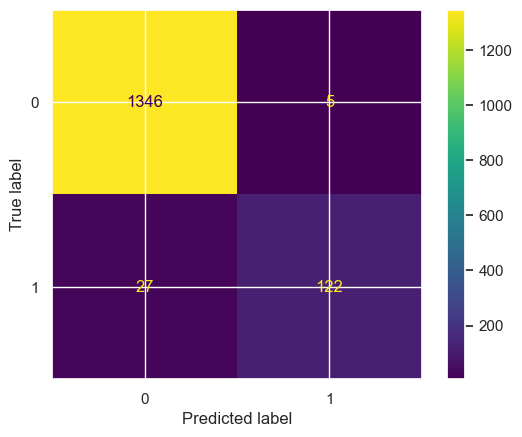

In [66]:
desTree_op = DecisionTreeClassifier(random_state=1, ccp_alpha=0.001, criterion="entropy", max_depth=11, min_samples_leaf=4, min_samples_split=2)
desTree_op.fit(X_train, y_train)
print_stats(desTree_op, X_train, X_test, y_train, y_test)

    Decision Tree model doesn't improve further


### Random Forest Model


Recall train: 1.0
Recall test: 0.8187919463087249


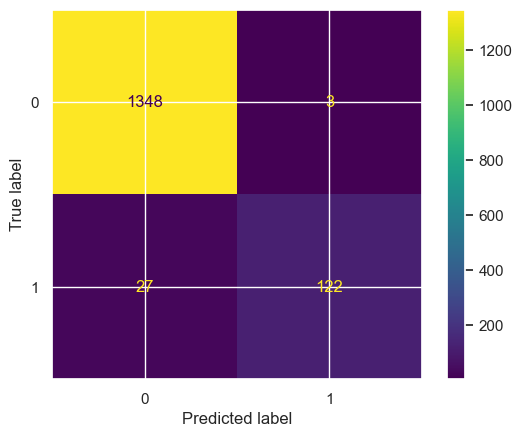

In [67]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)
print_stats(rfc, X_train, X_test, y_train, y_test)

    Random Forest model is overfitting as well

Find better hyperparameters using grid search CV


In [68]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": range(10, 100, 10),
    "max_depth": range(0, 35, 5),
    "min_samples_leaf": range(1, 10),
    "max_features": ["sqrt", "log2"],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
grid_cv = GridSearchCV(rfc, params, scoring=scorer, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print("Best parameters are {} with CV recall score={}:".format(grid_cv.best_params_, grid_cv.best_score_))

Best parameters are {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 20} with CV recall score=0.8732732732732732:


Recall train: 0.9939577039274925
Recall test: 0.8187919463087249


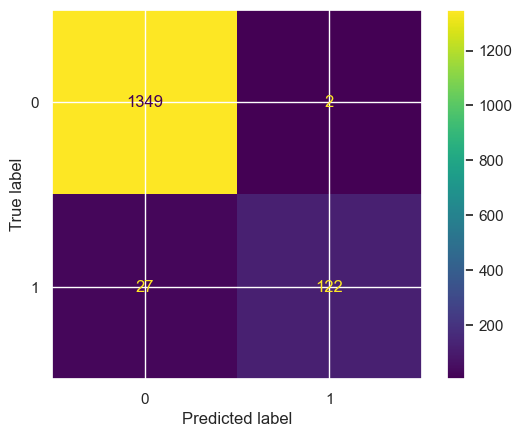

In [69]:
rfc_op = RandomForestClassifier(random_state=1, max_depth=20, max_features="sqrt", min_samples_leaf=1, n_estimators=20)
rfc_op.fit(X_train, y_train)
print_stats(rfc_op, X_train, X_test, y_train, y_test)

### AdaBoost Model


Recall train: 0.7613293051359517
Recall test: 0.6644295302013423


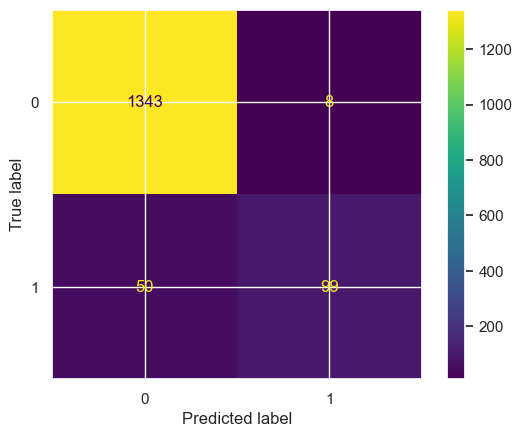

In [70]:
from sklearn.ensemble import AdaBoostClassifier


ab = AdaBoostClassifier(random_state=1, algorithm="SAMME")
ab.fit(X_train, y_train)
print_stats(ab, X_train, X_test, y_train, y_test)

Find better hyperparameters using grid search CV


In [71]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

params = {"n_estimators": range(10, 100, 10), "learning_rate": np.linspace(0.1, 2, 20)}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
grid_cv = GridSearchCV(ab, params, scoring=scorer, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print("Best parameters are {} with CV recall score={}:".format(grid_cv.best_params_, grid_cv.best_score_))

Best parameters are {'learning_rate': 2.0, 'n_estimators': 10} with CV recall score=0.984903084903085:


Recall train: 1.0
Recall test: 0.9731543624161074


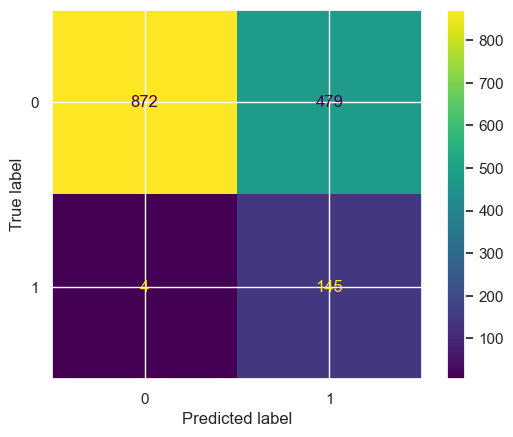

In [72]:
ab_op = AdaBoostClassifier(random_state=1, algorithm="SAMME", learning_rate=2, n_estimators=10)
ab_op.fit(X_train, y_train)
print_stats(ab_op, X_train, X_test, y_train, y_test)

### SVM Model


Recall train: 0.0
Recall test: 0.0


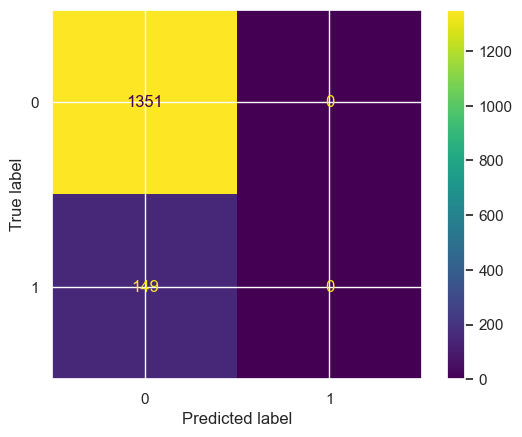

In [73]:
from sklearn.svm import SVC

svm = SVC(random_state=1, kernel="rbf")
svm.fit(X_train, y_train)
print_stats(svm, X_train, X_test, y_train, y_test)

    SVM with rbf kernell Doesn't perform well


Find better hyperparameters using grid search CV


In [74]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

params = {
    "C": np.logspace(-5, 5, 11, base=2),
    "gamma": np.logspace(-5, 5, 11, base=2),
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
grid_cv = GridSearchCV(svm, params, scoring=scorer, cv=None, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print("Best parameters are {} with CV recall score={}:".format(grid_cv.best_params_, grid_cv.best_score_))

Best parameters are {'C': 0.03125, 'gamma': 0.03125} with CV recall score=0.0:


Recall train: 0.0
Recall test: 0.0


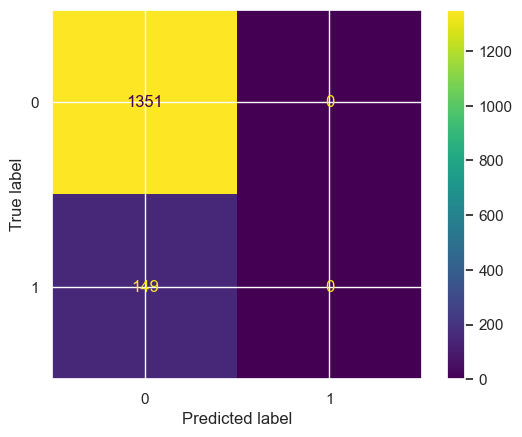

In [75]:
svm_op = SVC(random_state=1, C=0.03125, gamma=0.03125, kernel="rbf")
svm_op.fit(X_train, y_train)
print_stats(svm_op, X_train, X_test, y_train, y_test)

# Final Results


In [79]:
# print recall from all models
print("Recall Logistic Regression:", recall_score(y_test, logReg.predict(X_test)))
print("Recall Logistic Regression optimized:", logReg_op_test_score)
print("Recall Decision Tree:", recall_score(y_test, desTree.predict(X_test)))
print("Recall Decision Tree optimized:", recall_score(y_test, desTree_op.predict(X_test)))
print("Recall Random Forest:", recall_score(y_test, rfc.predict(X_test)))
print("Recall Random Forest optimized:", recall_score(y_test, rfc_op.predict(X_test)))
print("Recall AdaBoost:", recall_score(y_test, ab.predict(X_test)))
print("Recall AdaBoost optimized:", recall_score(y_test, ab_op.predict(X_test)))
print("Recall SVM:", recall_score(y_test, svm.predict(X_test)))
print("Recall SVM optimized:", recall_score(y_test, svm_op.predict(X_test)))

Recall Logistic Regression: 0.24161073825503357
Recall Logistic Regression optimized: 0.9261744966442953
Recall Decision Tree: 0.8859060402684564
Recall Decision Tree optimized: 0.8187919463087249
Recall Random Forest: 0.8187919463087249
Recall Random Forest optimized: 0.8187919463087249
Recall AdaBoost: 0.6644295302013423
Recall AdaBoost optimized: 0.9731543624161074
Recall SVM: 0.0
Recall SVM optimized: 0.0


# AdaBoost is our best model with a recall score of 0.9732


Recall train: 1.0
Recall test: 0.9731543624161074


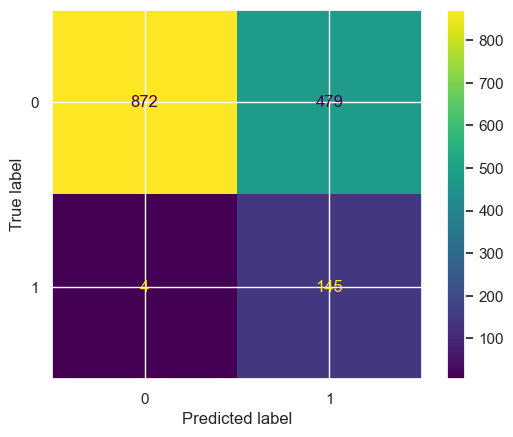

In [77]:
best_model = ab_op
print_stats(best_model, X_train, X_test, y_train, y_test)

### List Feature Importance


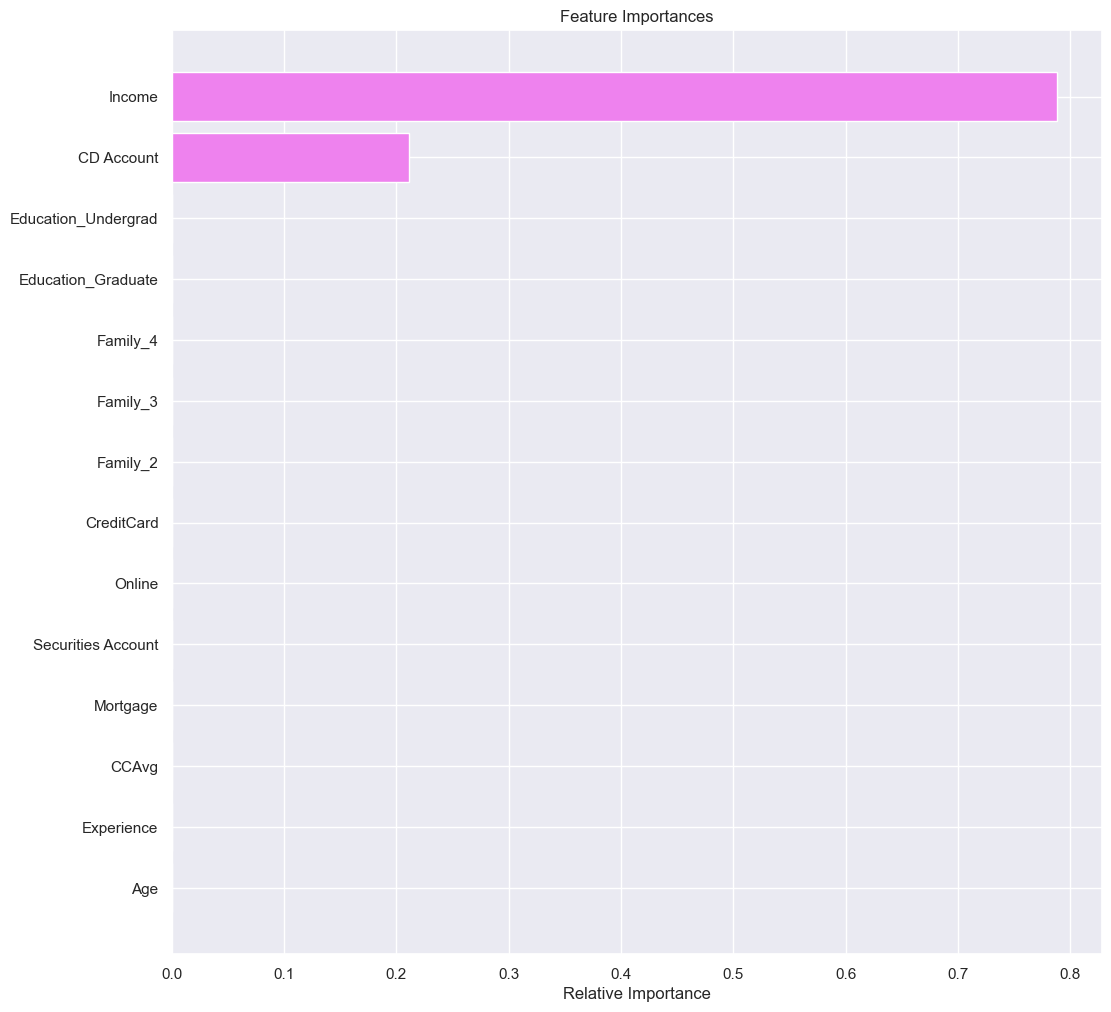

In [78]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()